In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
hh = np.loadtxt('RDF(HH)')
oh = np.loadtxt('RDF(OH)')
oo = np.loadtxt('RDF(OO)')

gr = np.loadtxt('../NeutronSQ-ReferenceData.r')
gr_calc = np.loadtxt('../NeutronSQ-SimulatedFR.r')

bragg = np.loadtxt('../Bragg-Reflections.txt', usecols=(1,6))
fq = np.loadtxt('../IceVII_norm.sq')

xyzCalc = np.loadtxt('./coordinates/coords.xyz.2000', skiprows=2, usecols=(1,2,3))
xyzPerf = np.loadtxt('../10cell.xyz', skiprows=2, usecols=(1,2,3))

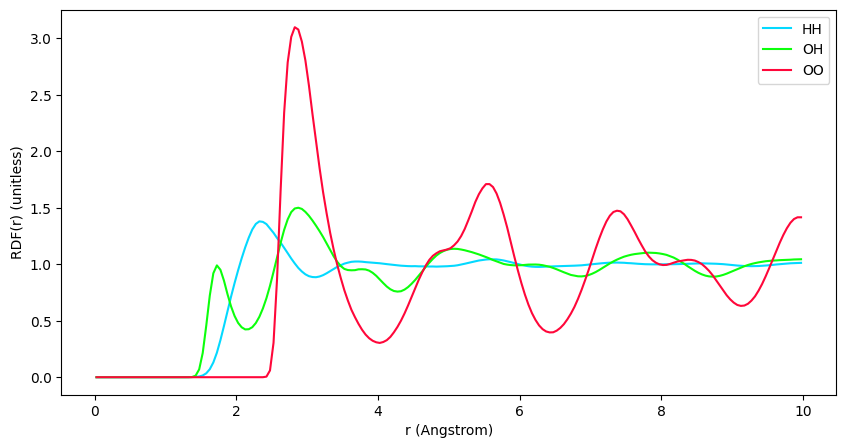

In [3]:
plt.rcParams["figure.figsize"] = (10,5)

plt.plot(hh[:,0], hh[:,1], label='HH', color='xkcd:neon blue')
plt.plot(oh[:,0], oh[:,1], label='OH', color='xkcd:neon green')
plt.plot(oo[:,0], oo[:,1], label='OO', color='xkcd:neon red')

plt.xlabel('r (Angstrom)')
plt.ylabel('RDF(r) (unitless)')
plt.legend()
plt.savefig('RDF.png', dpi=300)
plt.show()

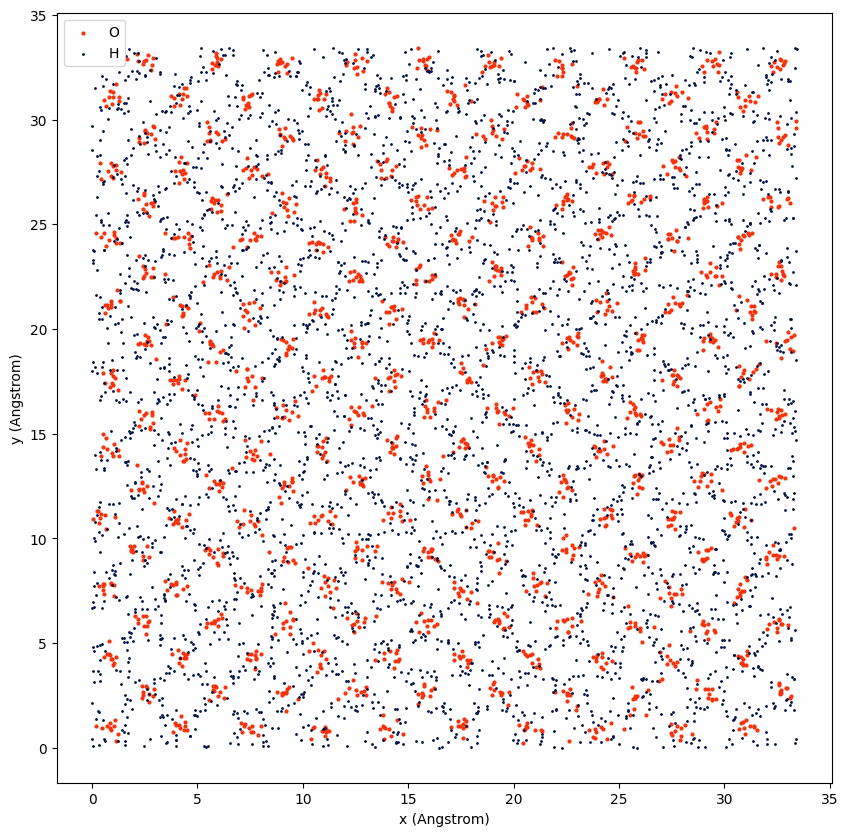

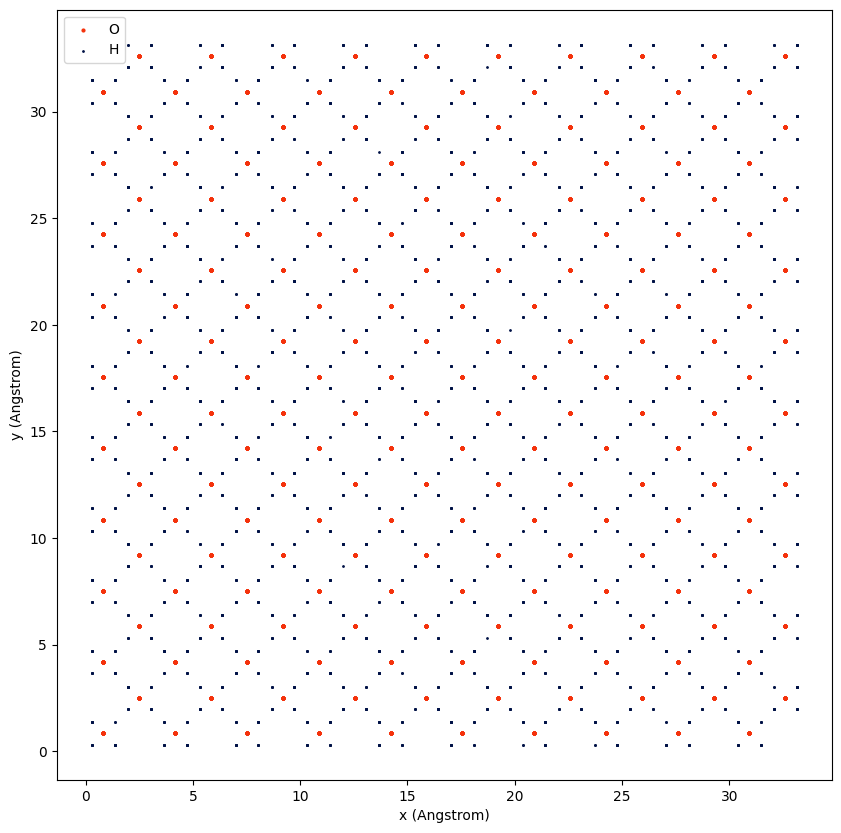

In [51]:
O = []
H = []
for idx, atom in enumerate(xyzCalc):
	if idx % 3 == 0:
		O.append(atom)
	else:
		H.append(atom)

OCalc = np.array(O)
HCalc = np.array(H)

O = []
H = []
for idx, atom in enumerate(xyzPerf):
	if idx % 3 == 0:
		O.append(atom)
	else:
		H.append(atom)

OPerf = np.array(O)
HPerf = np.array(H)

plt.rcParams["figure.figsize"] = (10,10)

plt.scatter(OCalc[:,0], OCalc[:,1], s=4, color='xkcd:vermillion', label='O')
plt.scatter(HCalc[:,0], HCalc[:,1], s=1, color='xkcd:navy blue', label='H')
plt.xlabel('x (Angstrom)')
plt.ylabel('y (Angstrom)')
plt.legend()
plt.savefig('coordsCalc.png', dpi=300)
plt.show()

plt.scatter(OPerf[:,0], OPerf[:,1], s=4, color='xkcd:vermillion', label='O')
plt.scatter(HPerf[:,0], HPerf[:,1], s=1, color='xkcd:navy blue', label='H')
plt.xlabel('x (Angstrom)')
plt.ylabel('y (Angstrom)')
plt.legend()
plt.savefig('coordsPerf.png', dpi=300)
plt.show()


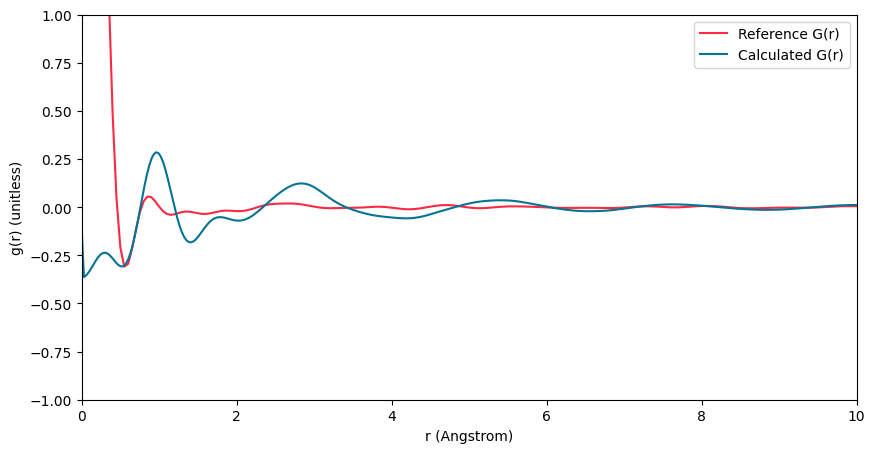

In [17]:
plt.rcParams["figure.figsize"] = (10,5)

plt.plot(gr[:,0], gr[:,1], label='Reference G(r)', color='xkcd:strawberry')
plt.plot(gr_calc[:,0], gr_calc[:,1], label='Calculated G(r)', color='xkcd:sea blue')

plt.xlim([0, 10])
plt.xlabel('r (Angstrom)')
plt.ylim([-1, 1])
plt.ylabel('g(r) (unitless)')
plt.legend()
plt.savefig('GR.png', dpi=300)
plt.show()

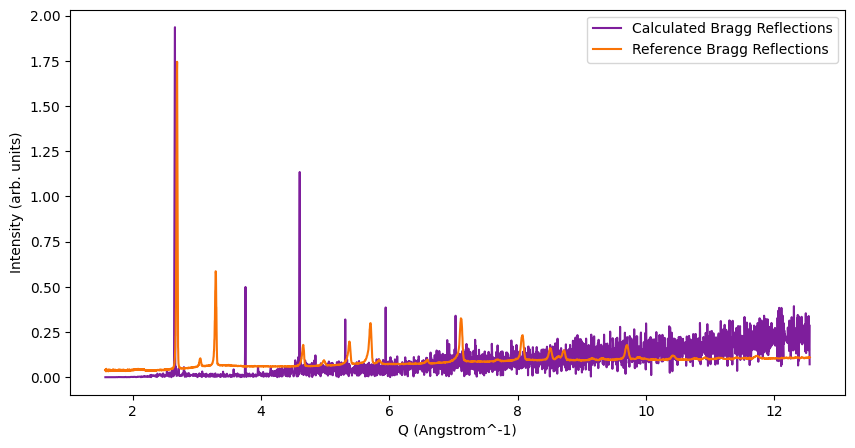

In [41]:
normFactor = np.trapz(bragg[:,1], bragg[:,0])
bragg[:,1] = bragg[:,1] / normFactor

plt.rcParams["figure.figsize"] = (10,5)

plt.plot(bragg[:,0], bragg[:,1], label='Calculated Bragg Reflections', color='xkcd:purple')
plt.plot(fq[:,0], fq[:,1], label='Reference Bragg Reflections', color='xkcd:orange')

plt.xlabel('Q (Angstrom^-1)')
plt.ylabel('Intensity (arb. units)')
plt.legend()
plt.savefig('Bragg.png', dpi=300)
plt.show()